In [89]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from pathlib import Path
from statsmodels.graphics.tsaplots import plot_acf
import warnings
warnings.filterwarnings("ignore")

In [80]:
# Set plot styling
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

tickers = ['AAL','ALGT','ALK','DAL','ITA','IYT','JBLU','JETS','LUV','UAL','BNO']
tickers_sub = ['AAL','ALGT','ALK','DAL','JBLU','LUV','UAL']

# Load the stock price data
data_path = Path("../../Data/Processed/merged_data_finance.pkl")
with open(data_path, 'rb') as f:
    df = pickle.load(f)

In [81]:
sentiment_cols = [i for i in df.columns if any(x in i for x in ['Article Count', 'Tone'])] + [i for i in df.columns if i.startswith('c') or i.startswith('v')]
sentiment_cols = [i for i in sentiment_cols if 'cum' not in i]

C:\Users\Steven\AppData\Local\Temp\ipykernel_28068\1851109879.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  volumes.rename(columns={


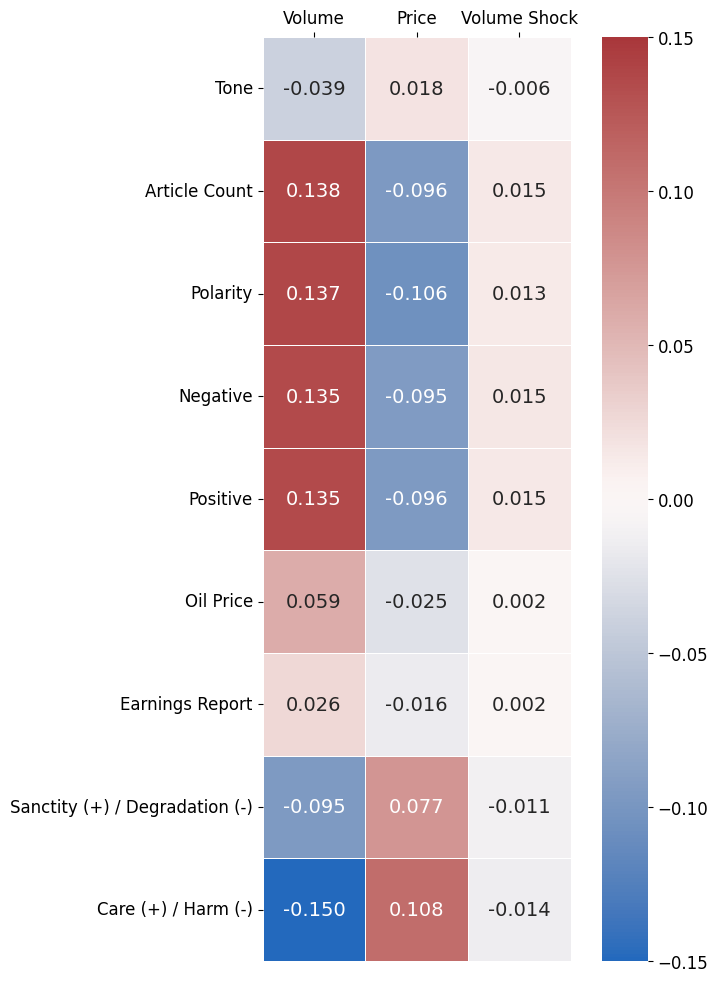

In [82]:
volumes = df[['Volume', 'Volume_lag01', 'Last', 'Last_lag01', 'Volume_Shock_ma04', 'Tone_lag01', 'Article Count_lag01', 'v11.1; SCOREDVALUE; Polarity (Scored Value)_lag01', 'v10.2; SCOREDVALUE; Negative (Scored Value)_lag01', 'v10.1; SCOREDVALUE; Positive (Scored Value)_lag01', 'c18.314; WORDCOUNT; ECON_OILPRICE_lag01', 'c18.60; WORDCOUNT; ECON_EARNINGSREPORT_lag01', 'v42.7; SCOREDVALUE; care_sent_lag01', 'v42.11; SCOREDVALUE; sanctity_sent_lag01']]

volumes.rename(columns={
    'Tone_lag01': 'Tone',
    'Article Count_lag01': 'Article Count',
    'v11.1; SCOREDVALUE; Polarity (Scored Value)_lag01': 'Polarity',
    'v10.2; SCOREDVALUE; Negative (Scored Value)_lag01': 'Negative',
    'v10.1; SCOREDVALUE; Positive (Scored Value)_lag01': 'Positive',
    'c18.314; WORDCOUNT; ECON_OILPRICE_lag01': 'Oil Price',
    'c18.60; WORDCOUNT; ECON_EARNINGSREPORT_lag01': 'Earnings Report',
    'v42.7; SCOREDVALUE; care_sent_lag01': 'Care (+) / Harm (-)',
    'v42.11; SCOREDVALUE; sanctity_sent_lag01': 'Sanctity (+) / Degradation (-)',
    'Last': 'Price',
    'Volume_Shock_ma04': 'Volume Shock'
}, inplace=True)

# Compute correlation matrix
correlation_matrix = volumes.corr()
correlation_matrix = correlation_matrix[['Volume', 'Price', 'Volume Shock']]
correlation_matrix = correlation_matrix.filter(['Tone', 'Article Count', 'Polarity', 'Negative', 'Positive', 'Oil Price', 'Earnings Report', 'Sanctity (+) / Degradation (-)', 'Care (+) / Harm (-)'], axis=0)
correlation_matrix

# Visualize the correlation matrix as a heatmap
plot_data = correlation_matrix
plt.figure(figsize=(8, 12))
ax = sns.heatmap(plot_data, annot=True, cmap='vlag', vmin=-0.15, vmax=0.15, fmt='.3f',linewidths=0.5,square=True,annot_kws={'size': 14})
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
plt.savefig('../../Output/correlations.pdf', bbox_inches='tight')

In [84]:
volumes = df[['date', 'ticker', 'Volume', 'Change_Volume']]

In [87]:
volume_copy = volumes.copy()
volume_copy[[f'lag1Vol', 'lag1Change']] = volume_copy.groupby('ticker')[['Volume', 'Change_Volume']].shift(1)
volume_copy = volume_copy.dropna()
corr = volume_copy.groupby('ticker').corr().reset_index()
corr

,ticker,level_1,date,Volume,Change_Volume,lag1Vol,lag1Change
0,AAL,date,1.000000,0.185716,0.000069,0.185701,-0.000009
1,AAL,Volume,0.185716,1.000000,0.368331,0.728998,0.181870
2,AAL,Change_Volume,0.000069,0.368331,1.000000,-0.367878,-0.252787
3,AAL,lag1Vol,0.185701,0.728998,-0.367878,1.000000,0.368027
4,AAL,lag1Change,-0.000009,0.181870,-0.252787,0.368027,1.000000
5,ALGT,date,1.000000,0.105518,0.000064,0.105504,-0.000001
6,ALGT,Volume,0.105518,1.000000,0.639736,0.182236,0.066865
7,ALGT,Change_Volume,0.000064,0.639736,1.000000,-0.639141,-0.447525
8,ALGT,lag1Vol,0.105504,0.182236,-0.639141,1.000000,0.639422
9,ALGT,lag1Change,-0.000001,0.066865,-0.447525,0.639422,1.000000


In [93]:
table_df = pd.DataFrame()
table_df.index = tickers_sub
i=1
volume_copy = volumes.copy()
volume_copy[[f'lag{i}Vol',f'lag{i}Change']] = volume_copy.groupby('ticker')[['Volume', 'Change_Volume']].shift(i)
volume_copy = volume_copy.dropna()
corr = volume_copy.groupby('ticker').corr().reset_index()
corr1 = corr[corr['level_1'] == 'Volume']
corr2 = corr[corr['level_1'] == 'Change_Volume']
corr1 = corr1[['ticker', f'lag{i}Vol']]
corr2 = corr2[['ticker', f'lag{i}Change']]
corr1.index = corr1['ticker']
corr2.index = corr2['ticker']
corr1.drop(columns='ticker', inplace=True)
corr2.drop(columns='ticker', inplace=True)

table_df[f'{i}, Volume'] = corr1[f'lag{i}Vol']
table_df[f'{i}, Change'] = corr2[f'lag{i}Change']

table_df

,"1, Volume","1, Change"
AAL,0.728998,-0.252787
ALGT,0.182236,-0.447525
ALK,0.458134,-0.377489
DAL,0.822799,-0.172707
JBLU,0.532583,-0.351793
LUV,0.639515,-0.305230
UAL,0.816798,-0.228361


In [ ]:
table_df = pd.DataFrame()
table_df.index = tickers_sub

for i in range(1,131):
    volume_copy = volumes.copy()
    volume_copy[[f'lag{i}Vol',f'lag{i}Change']] = volume_copy.groupby('ticker')[['Volume', 'Change_Volume']].shift(i)
    volume_copy = volume_copy.dropna()
    corr = volume_copy.groupby('ticker').corr().reset_index()
    corr1 = corr[corr['level_1'] == 'Volume']
    corr2 = corr[corr['level_1'] == 'Change_Volume']
    corr1 = corr1[['ticker', f'lag{i}Vol']]
    corr2 = corr2[['ticker', f'lag{i}Change']]
    corr1.index = corr1['ticker']
    corr2.index = corr2['ticker']
    corr1.drop(columns='ticker', inplace=True)
    corr2.drop(columns='ticker', inplace=True)

    table_df[f'{i}, Volume'] = corr1[f'lag{i}Vol']
    table_df[f'{i}, Change'] = corr2[f'lag{i}Change']

table_df = table_df.unstack().reset_index().rename(columns={'level_0': 'Description', 'level_1': 'ticker', 0: 'Autocorrelation'})
table_df = table_df.groupby('Description').agg({
    'Autocorrelation': ['mean', 'min', 'max']
}).reset_index()

# Flatten the MultiIndex columns
table_df.columns = ['Description', 'Autocorrelation', 'min', 'max']
table_df[['Lag','Description']] = table_df['Description'].str.split(',', expand=True)
table_df['Lag'] = table_df['Lag'].astype(float)
table_df['Lag'] = table_df['Lag'] / 26
table_df.sort_values(by=['Description','Lag'], inplace=True)
table_df

,Description,Autocorrelation,min,max,Lag
0,Change,-0.305127,-0.447525,-0.172707,0.038462
84,Change,-0.094601,-0.135296,-0.042031,0.076923
106,Change,-0.026496,-0.058987,0.001879,0.115385
128,Change,-0.018141,-0.030455,-0.006590,0.153846
150,Change,-0.007234,-0.025248,0.002239,0.192308
...,...,...,...,...,...
61,Volume,0.252766,0.017367,0.521212,4.846154
63,Volume,0.281230,0.031425,0.550515,4.884615
65,Volume,0.313986,0.048383,0.588326,4.923077
67,Volume,0.392823,0.141002,0.651394,4.961538


In [110]:
table_df1 = table_df[table_df['Description']==' Volume']
table_df2 = table_df[table_df['Description']==' Change']

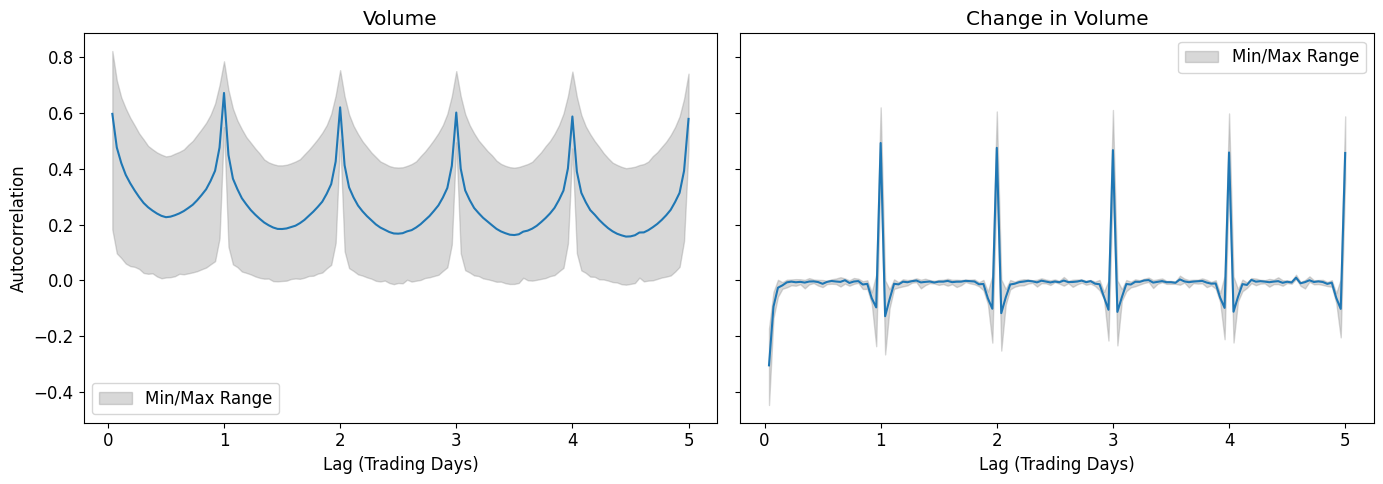

In [120]:
# Plot mean autocorrelation for Volume and Change side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

# Volume plot
sns.lineplot(data=table_df1, x='Lag', y='Autocorrelation', ax=axes[0])
axes[0].fill_between(table_df1['Lag'], table_df1['min'], table_df1['max'], color='gray', alpha=0.3, label='Min/Max Range')
axes[0].set_xlabel('Lag (Trading Days)')
axes[0].set_ylabel('Autocorrelation')
axes[0].set_title('Volume')
axes[0].legend()

# Change plot
sns.lineplot(data=table_df2, x='Lag', y='Autocorrelation', ax=axes[1])
axes[1].fill_between(table_df2['Lag'], table_df2['min'], table_df2['max'], color='gray', alpha=0.3, label='Min/Max Range')
axes[1].set_xlabel('Lag (Trading Days)')
axes[1].set_title('Change in Volume')
axes[1].legend()

plt.tight_layout()
plt.savefig('../../Output/Volume Autocorrelations.pdf')

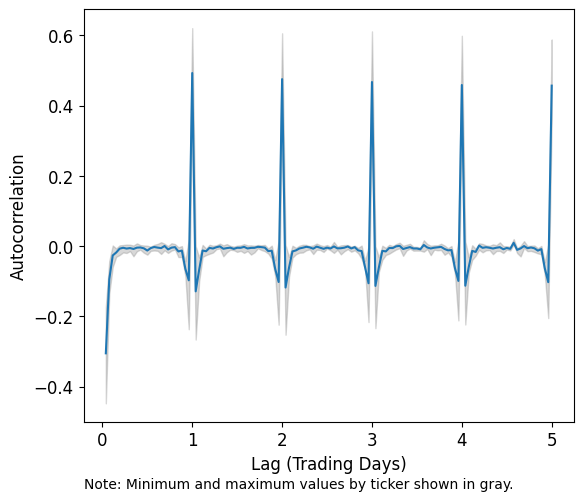

In [76]:
# Plot mean autocorrelation with min/max shaded region
plt.figure(figsize=(6,5))
sns.lineplot(data=table_df, x='Lag', y='Autocorrelation')
plt.fill_between(table_df['Lag'], table_df['min'], table_df['max'], color='gray', alpha=0.3, label='Min/Max Range')
plt.xlabel('Lag (Trading Days)')
plt.ylabel('Autocorrelation')
plt.tight_layout()
# add a source note
plt.text(0, -0.15, 'Note: Minimum and maximum values by ticker shown in gray.', ha='left', va='center', transform=plt.gca().transAxes, fontsize=10)
plt.savefig('../../Output/Volume Autocorrelations.pdf', bbox_inches='tight')

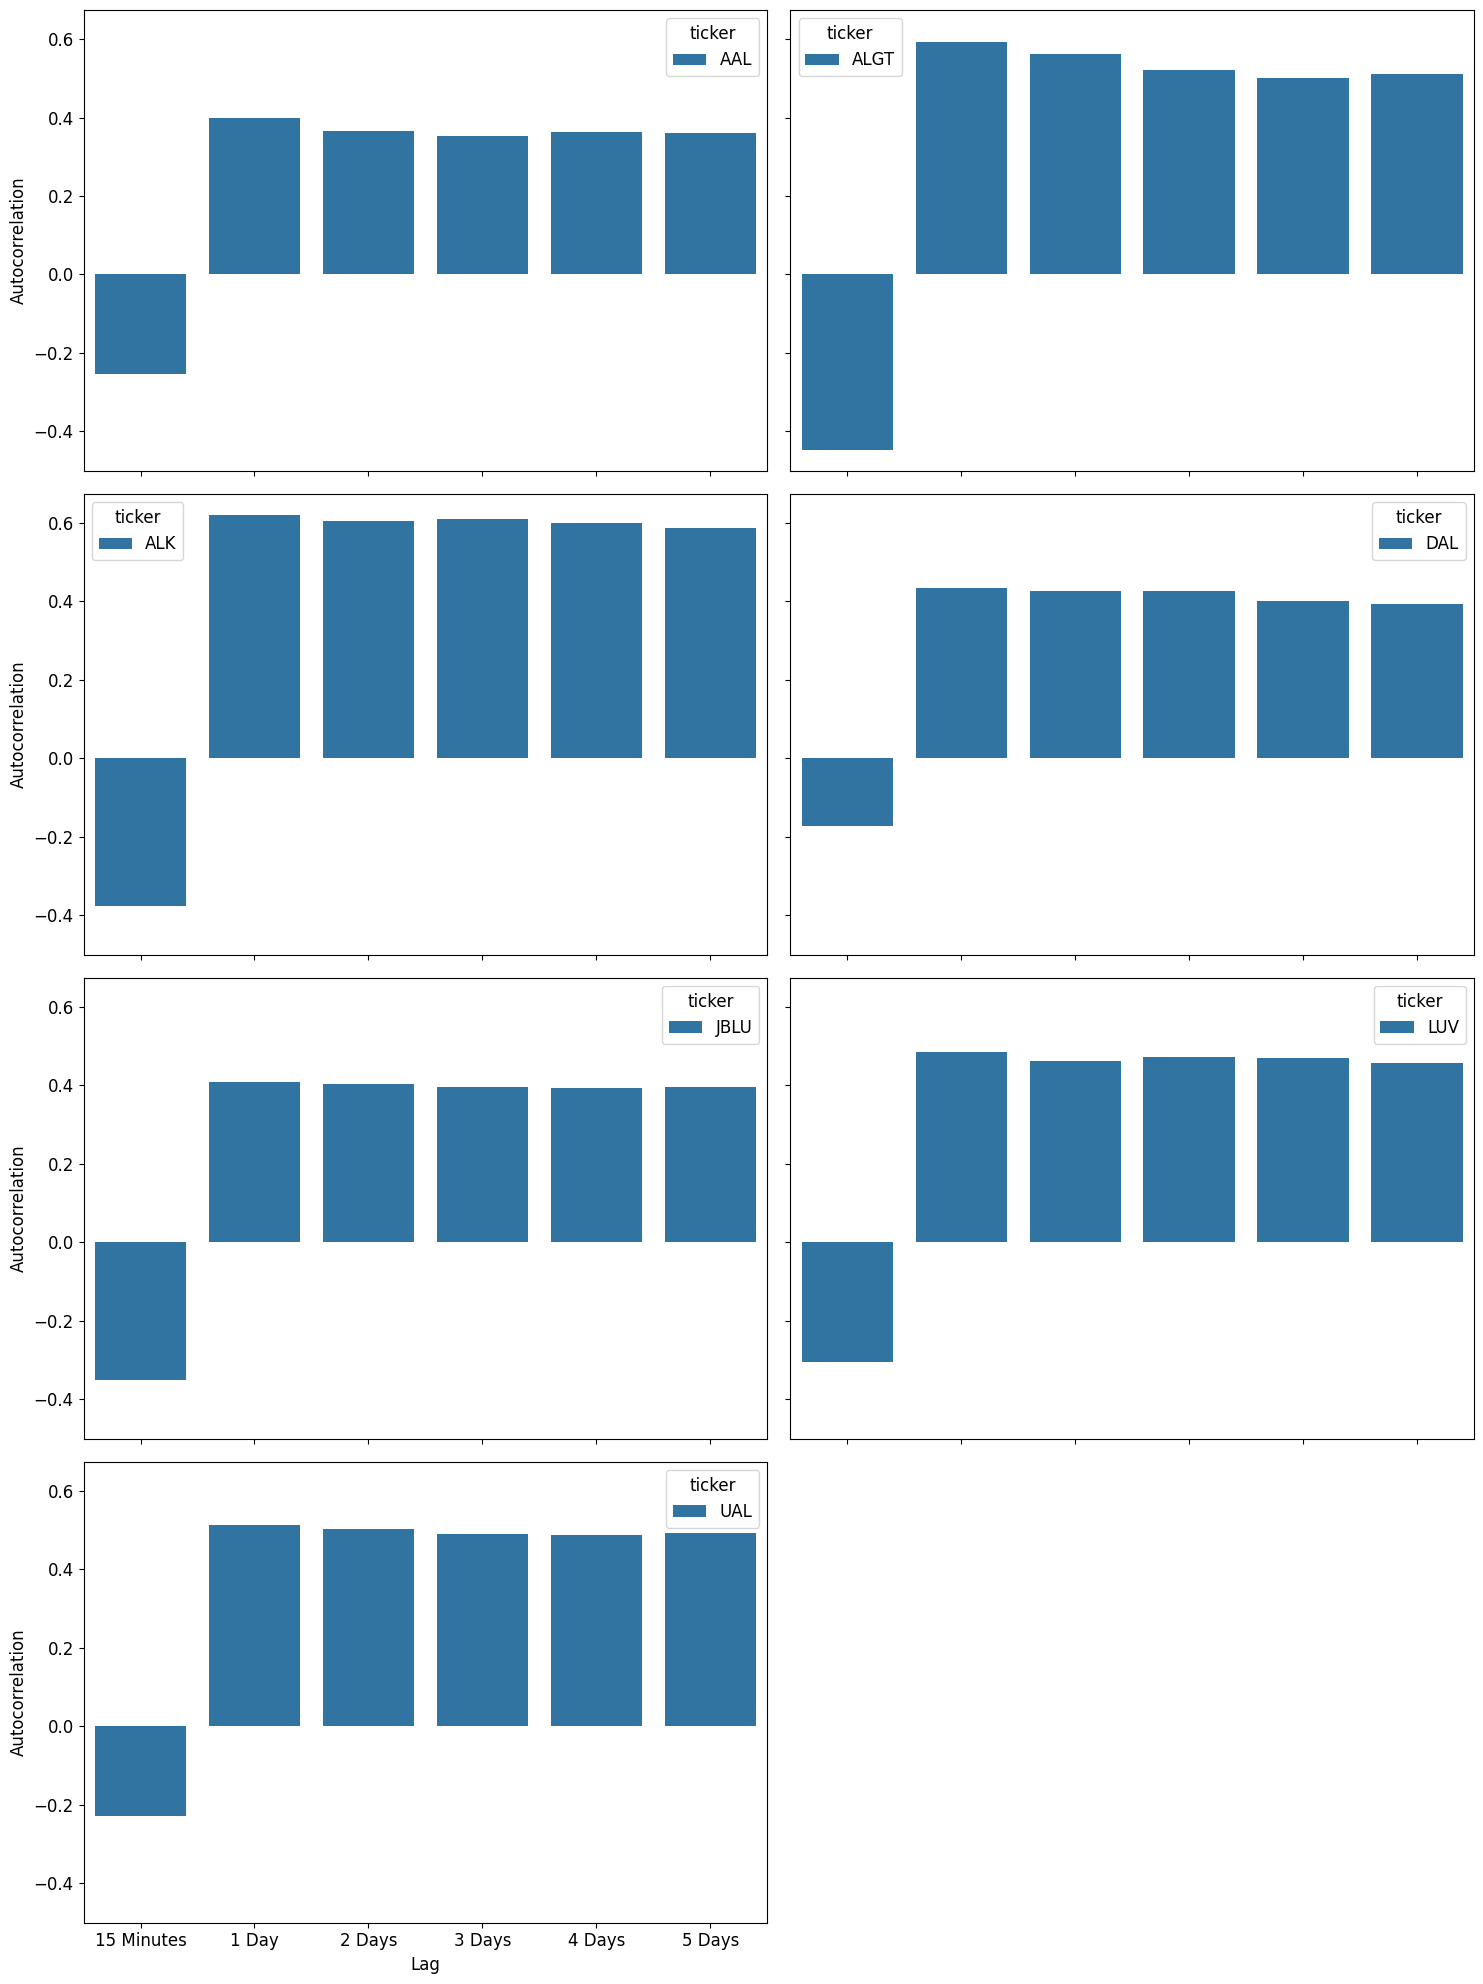

In [38]:
# Create a matrix of autocorrelation plots for all tickers
fig, axes = plt.subplots(4, 2, figsize=(15, 20), sharex=True, sharey=True)
axes = axes.flatten()

for i, ticker in enumerate(tickers_sub):
    # Plot autocorrelation for each ticker
    sns.barplot(data=table_df[table_df['ticker'] == ticker], 
                x='Lag', 
                y='Autocorrelation', 
                hue='ticker',
                ax=axes[i])
    axes[i].title = ticker
    
    
    # Customize each subplot
#    axes[i].set_xlabel('Lag (15-Minute Periods)', fontsize=10)
#    axes[i].grid(True, alpha=0.3)
#    axes[i].set_title(f'{ticker}', fontsize=14)

# Remove unused subplots
for j in range(len(tickers_sub), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
#plt.savefig('../../Output/Correlation Matrices/Autocorrelations.pdf')